In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def cosine(x, w=1):
    return np.cos(w*x)

identity = np.array([[1, 0], [0,1]])
x = np.array([[0, 1], [1, 0]])
y = np.array([[0, 1j], [-1j, 0]])
z = np.array([[1, 0], [0,-1]])

hamiltonJW = -0.812610724885215 * np.kron(np.kron(identity, identity), np.kron(identity, identity)) + 0.17120123768237194 * np.kron(np.kron(identity, identity), np.kron(identity, z)) - 0.22279639536026685 * np.kron(identity, np.kron(identity, np.kron(z, identity))) + 0.12054612726205871 * np.kron(identity, np.kron(identity, np.kron(z, z))) + 0.17120123768237205 * np.kron(identity, np.kron(z, np.kron(identity, identity))) + 0.168623275831502 * np.kron(identity, np.kron(z, np.kron(identity, z))) + 0.04532188395308155 * np.kron(y, np.kron(y, np.kron(y, y))) + 0.04532188395308155 * np.kron(x, np.kron(x, np.kron(y, y))) + 0.04532188395308155 * np.kron(y, np.kron(y, np.kron(x, x))) + 0.04532188395308155 * np.kron(x, np.kron(x, np.kron(x, x))) - 0.22279639536026719 * np.kron(z, np.kron(identity, np.kron(identity, identity))) + 0.16586801121514025 * np.kron(z, np.kron(identity, np.kron(identity, z))) + 0.16586801121514028 * np.kron(identity, np.kron(z, np.kron(z, identity))) + 0.17434948745510506 * np.kron(z, np.kron(identity, np.kron(z, identity))) + 0.12054612726205871 * np.kron(z, np.kron(z, np.kron(identity, identity)))

In [4]:
def U_exact(t):
    temp = scipy.linalg.expm(-1j* hamiltonJW*t)
    return temp[5][5]

In [5]:
def TrotterStep(t):
    mat1 = (-0.812610724885215 * np.kron(identity, np.kron(identity, np.kron(identity, identity))) + 0.17120123768237194 * np.kron(identity, np.kron(identity, np.kron(identity, z))) - 0.22279639536026685 * np.kron(identity, np.kron(identity, np.kron(z, identity))) + 0.12054612726205871 * np.kron(identity, np.kron(identity, np.kron(z, z))) + 0.17120123768237205 * np.kron(identity, np.kron(z, np.kron(identity, identity))) + 0.168623275831502 * np.kron(identity, np.kron(z, np.kron(identity, z))) - 0.22279639536026719 * np.kron(z, np.kron(identity, np.kron(identity, identity))) + 0.16586801121514025 * np.kron(z, np.kron(identity, np.kron(identity, z))) + 0.16586801121514028 * np.kron(identity, np.kron(z, np.kron(z, identity))) + 0.17434948745510506 * np.kron(z, np.kron(identity, np.kron(z, identity))) + 0.12054612726205871 * np.kron(z, np.kron(z, np.kron(identity, identity))))*t
    mat2 = (0.04532188395308155 * np.kron(x, np.kron(x, np.kron(x, x))) + 0.04532188395308155 * np.kron(y, np.kron(y, np.kron(y, y))))*t
    mat3 = (0.04532188395308155 * np.kron(x, np.kron(x, np.kron(y, y))) + 0.04532188395308155 * np.kron(y, np.kron(y, np.kron(x, x))))*t
    res = np.matmul(scipy.linalg.expm(-1j*mat1), np.matmul(scipy.linalg.expm(-1j*mat2), scipy.linalg.expm(-1j*mat3)))
    return res


def Utrotter(steps, TimeStep):
    temp = TrotterStep(TimeStep)
    res = np.identity(16)
    for _ in range(steps):
        res = np.matmul(res, temp)
    return np.real(res[5][5])



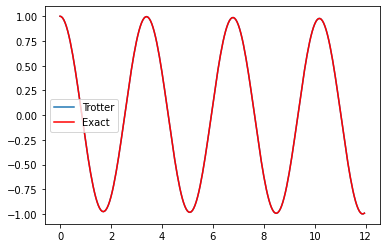

In [6]:
# define stepsize and number of Trotter steps
stepsize = 0.05
numsteps = 240

# t stores every moment in time, U is evaluated
t = np.arange(0, numsteps*stepsize, stepsize)

# create data for Trotter simulation
y_data_trotter = np.zeros(numsteps)
y_data_exact = np.zeros(numsteps)
for j in range(numsteps):
    y_data_trotter[j] = np.real(Utrotter(j, stepsize))
    y_data_exact[j] = np.real(U_exact(t[j]))
plt.plot(t, y_data_trotter, label='Trotter')
plt.plot(t, y_data_exact, 'r-', label='Exact')
plt.legend()

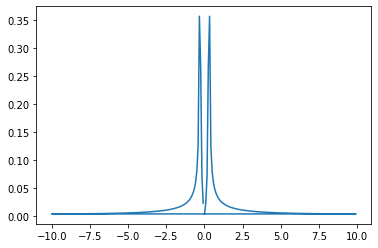

In [34]:
fourier_exact = np.abs(np.fft.fft(y_data_exact, len(y_data_exact))/numsteps)
freqs_exact = np.fft.fftfreq(len(fourier_exact), stepsize)
plt.plot(freqs_exact, fourier_exact)

In [35]:
max_index = scipy.signal.find_peaks(fourier_exact)[0]
freqs_exact[max_index[0]]

0.3333333333333333

In [36]:
max_index = scipy.signal.find_peaks(y_data_exact)[0]
2*np.pi/(max_index[0] * 0.05)

1.8479956785822311

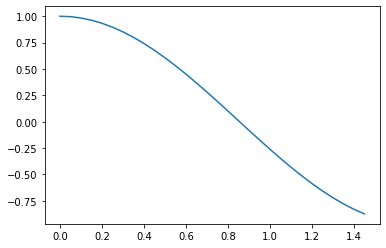

In [11]:
plt.plot(t[:30], y_data_trotter[:30], label='Trotter')

In [15]:
params = scipy.optimize.curve_fit(cosine, t[:30], y_data_trotter[:30])

In [16]:
params

(array([1.83211135]), array([[1.04225731e-06]]))